# Sprint 1 Part 3: Trying out Hugging Face models

In this Jupyter Notebook, we will try to use various Hugging Face models!

https://huggingface.co/models

## **Please be aware of the costs of calling LLMs like OpenAI or Gemini**.
###   Check the costs here for [OpenAI](https://platform.openai.com/settings/organization/billing/overview):
###   For Gemini it's [here](https://aistudio.google.com/app/apikey) and [here](https://ai.google.dev/pricing#1_5flash).

### (Optional) Saving API keys securely in Secrets tab

In production systems, saving API keys plainly in the code is not recommended.
You can instead save API keys in the Secrets tab in the Google Colab.

Just make sure to name these keys properly and read them in the Python cell:
* OPENAI_API_KEY
* GEMINI_API_KEY
* ANTHROPIC_API_KEY

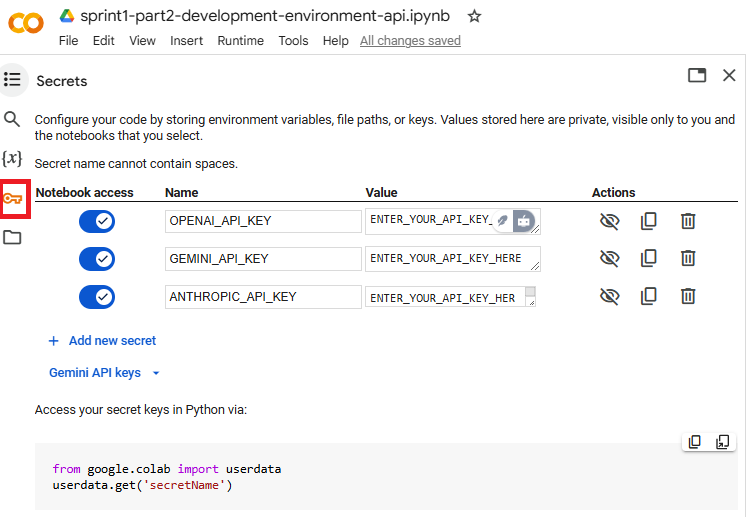

### Installing Python packages

In [ ]:
!pip install transformers torch -q

### Set-up all API keys

In [ ]:
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

# Alternatively, comment out the above and define the API keys via your own method:
# OPENAI_API_KEY =

# Ignoring all warnings
This is done, to clearly see the output from the cell, as well as to mitigate rapidly changing LangChain/LangGraph APIs.

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Import Python libraries

In [ ]:
from transformers import pipeline

# Example 1: Trying out Image detection model: nsfw_image_detection

https://huggingface.co/Falconsai/nsfw_image_detection



In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("Falconsai/nsfw_image_detection")
model = AutoModelForImageClassification.from_pretrained("Falconsai/nsfw_image_detection")

## Mount Google Drive and upload a test image
### Note: Ask Gemini if you can't figure out the correct path to the image that is on the drive

In [ ]:
# Use a pipeline as a high-level helper
from PIL import Image
from transformers import pipeline
import torch

img = Image.open("path to your image")

with torch.no_grad():
    inputs = processor(images=img, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits

predicted_label = logits.argmax(-1).item()
model.config.id2label[predicted_label]

# Exercise 1: Try out Text Classification model

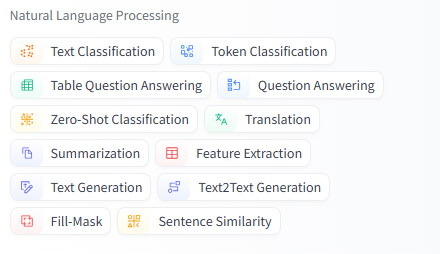

# Exercise 2: Try out Text-to-Image or Image-to-Text models

# Exercise 3: Try running multi-modal model

